# Facial Recognition Demo 


<div style="float: left; width: 75%; height: 200px; padding-bottom:400px">
    <img src="https://www.digitalvidya.com/wp-content/uploads/2018/09/Face-Recognition-Python-1280x720.jpg" alt="CNN">
</div>
</div>

In [1]:
# Clone Github Repo which includes sample data
!git clone https://github.com/BenchengW/Facial-Recognition-MMAI844-Tutorial

Cloning into 'Facial-Recognition-MMAI844-Tutorial'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 209 (delta 23), reused 198 (delta 12), pack-reused 0
Receiving objects: 100% (209/209), 10.58 MiB | 23.56 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [2]:
# Install VGGface for later use
! pip install keras-vggface
! pip install keras_preprocessing 
! pip install keras_applications

     |████████████████████████████████| 51kB 4.9MB/s 


# Facial Image Classification with Tensorflow pre-trained model

Face recognition is the general task of identifying and verifying people from photographs of their face.

<div style="float: left; width: 75%; height: 550px; padding-bottom:350px">
    <img src="https://pyimagesearch.com/wp-content/uploads/2018/09/opencv_face_reco_facenet.jpg" alt="CNN">
</div>
</div>

## Step 1.1: Importing Libraries
Import libraries and define environment variables

In [3]:
import cv2
import numpy as np
import os
import math
from matplotlib import pyplot as plt
%matplotlib inline
print(cv2.__version__)
%matplotlib inline
cv2.startWindowThread()
from os import listdir
from PIL import Image
import warnings
warnings.filterwarnings(action='once')
import urllib.request

4.1.2


In [4]:
import keras
import keras_vggface
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input
from keras_vggface.vggface import VGGFace
from tensorflow.keras import datasets, layers, models
from keras.optimizers import RMSprop, SGD
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
from numpy import asarray
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from keras.preprocessing import image

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Step 1.2: Load Data/Image

There are many ways to load images using Python, such as OpenCv, MatplotLib, PIL, etc

#### Read and Write Images Example  using OpenCV
``` python
cv2.imwrite(file_path (str), image (numpy.ndarray))
cv2.imread(file_path (str), read_mode (int))```
#### Read Modes
-  ```1 = cv2.IMREAD_COLOR```
-  ```0 = cv2.IMREAD_GRAYSCALE```
- ```-1 = cv2.IMREAD_UNCHANGED```

Load a Sample Smith image using opencv library

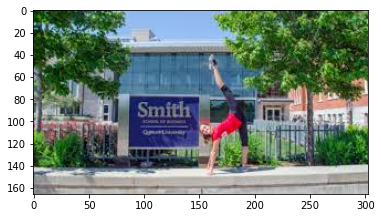

In [5]:
# Read Image using OpenCV

import cv2

img =cv2.imread("/content/Facial-Recognition-MMAI844-Tutorial/sample/Smith.jpg",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

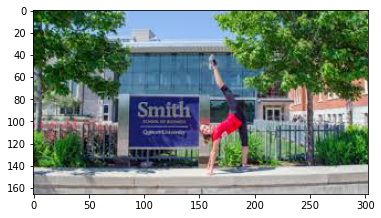

In [6]:
# Read Image using matplotlib

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
img = mpimg.imread('/content/Facial-Recognition-MMAI844-Tutorial/sample/Smith.jpg') 
plt.imshow(img) 

In [7]:
def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()

<div style="float: left; width: 75%; height: 550px; padding-bottom:350px">
    <img src="https://pyimagesearch.com/wp-content/uploads/2018/09/opencv_face_reco_facenet.jpg" alt="CNN">
</div>
</div>

## Step 1.3: Detecting Faces with OpenCV and front face detector xml 
``` python
detector = cv2.CascadeClassifier( xml_file_path)
face_coord = detector.detectMultiScale(image, scale_factor, min_neighbors, min_size, flags)
```
face_coord: Numpy array with rows equal to [x, y, width, height]

<div style="float: left; width: 75%; height: 200px; padding-bottom:350px">
    <img src="https://lh3.googleusercontent.com/IdcOyMJ4hCDvSJXWBo1Rxr1BTM9fQWoxShs0tdS93bpyQ1K6vIog_mV9LrfE0DwKK61X2fHY51AAbPJTkOOMDUVxaiE32JsGog74k3lnXKXPefpd_fSC3divPG3AEEQhaith6S47" alt="CNN">
</div>
</div>

#### Lets import a facial image to detect the face

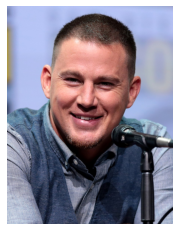

In [8]:
frame= cv2.imread('/content/Facial-Recognition-MMAI844-Tutorial/sample/channing_tatum.jpg')
name= "channing_tatum"
plt_show(frame)

#### Below is the loading of the OpenCv face detector module and the detectionn of the face coordinators on the image

In [9]:
detector = cv2.CascadeClassifier("/content/Facial-Recognition-MMAI844-Tutorial/xml/frontal_face.xml")

scale_factor = 1.2
min_neighbors = 5
min_size = (40, 40)
biggest_only = True
flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | \
            cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \
            cv2.CASCADE_SCALE_IMAGE
        
faces_coord = detector.detectMultiScale(frame,
                                        scaleFactor=scale_factor,
                                        minNeighbors=min_neighbors,
                                        minSize=min_size,
                                        flags=flags)
print("Type: " + str(type(faces_coord)))
print("this is face coordinator in the picture is {}".format(faces_coord))
print("Face is successfully detected!! Let draw a box on the picture")

Type: <class 'numpy.ndarray'>
this is face coordinator in the picture is [[197 211 512 512]]
Face is successfully detected!! Let draw a box on the picture


#### Define a function to draw a rectangle around the detected face

In [10]:
def draw_rectangle(image, coords):
    for (x, y, w, h) in coords:
        w_rm = int(0.2 * w / 2) 
        cv2.rectangle(image, (x + w_rm, y), (x + w - w_rm, y + h), 
                              (0, 0, 255), 8)

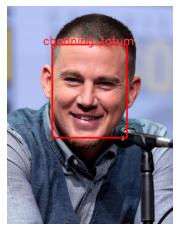

In [11]:
draw_rectangle(frame,faces_coord)
cv2.putText(frame, name,    
                            (faces_coord[0][0], faces_coord[0][1]),
                            cv2.FONT_HERSHEY_SIMPLEX , 2, (66, 53, 243), 6)
plt_show(frame)

In [12]:
############################################################
# Wrap up the code into a face detector module for later use
############################################################

class FaceDetector(object):
    def __init__(self, xml_path):
        self.classifier = cv2.CascadeClassifier(xml_path)
    
    def detect(self, image, biggest_only=True):
        scale_factor = 1.2
        min_neighbors = 5
        min_size = (30, 30)
        biggest_only = True
        flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | \
                    cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \
                    cv2.CASCADE_SCALE_IMAGE
        faces_coord = self.classifier.detectMultiScale(image,
                                                       scaleFactor=scale_factor,
                                                       minNeighbors=min_neighbors,
                                                       minSize=min_size,
                                                       flags=flags)
        return faces_coord

## Step 1.4: Cut Faces and resize faces

<div style="float: left; width: 75%; height: 550px; padding-bottom:350px">
    <img src="https://i0.wp.com/www.life2coding.com/wp-content/uploads/2018/01/crop.jpg?resize=768%2C628&ssl=1" alt="CNN">
</div>
</div>

for (x, y, w, h) in faces_coord:
    cv2.rectangle(frame, (x, y), (x + w, y + h), (150, 150, 0), 8)
plt_show(frame) 

In [13]:
def cut_faces(image, faces_coord):
    faces = []
      
    for (x, y, w, h) in faces_coord:
        w_rm = int(0.2 * w / 2)
        faces.append(image[y: y + h, x + w_rm: x + w - w_rm])
         
    return faces

In [14]:
Cut_Face = cut_faces(frame, faces_coord)

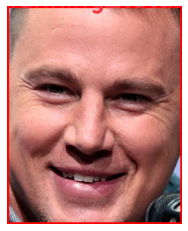

In [15]:
plt_show(Cut_Face[0])

#### Define a fuction to resize the face back to 224x224 resolution

In [16]:
def resize(images, size=(224, 224)):
    images_norm = []
    for image in images:
        if image.shape < size:
            image_norm = cv2.resize(image, size, 
                                    interpolation = cv2.INTER_AREA)
        else:
            image_norm = cv2.resize(image, size, 
                                    interpolation = cv2.INTER_CUBIC)
        images_norm.append(image_norm)

    return images_norm 

In [17]:
resize_faces = resize(Cut_Face)

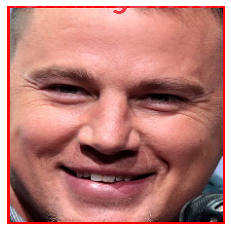

In [18]:
plt_show(resize_faces[0])

### Step 1.5: Standardize the image for fitting Neural Net Model

> Indented block



Normalizing image inputs: Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network.

For image inputs we need the pixel numbers to be positive, so we might choose to scale the normalized data in the range [0,1]

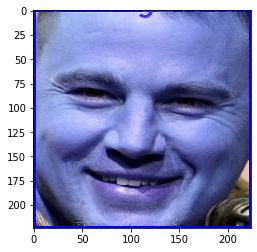

In [19]:
resize_face_stad = resize_faces[0]/255.0
plt.imshow((resize_faces[0]/255))

# Pre-trained Model in Tensorflow

## Step 2.1 Install libraries

VGGFace and VGGFace2 Models

The VGGFace refers to a series of models developed for face recognition and demonstrated on benchmark computer vision datasets by members of the Visual Geometry Group (VGG) at the University of Oxford.

#### For more information please visit the github link:https://github.com/rcmalli/keras-vggface

<div style="float: left; width: 90%; height: 250px; padding-bottom:280px">
    <img src="https://pbs.twimg.com/media/Dn2GdPfW0AE0nf7?format=jpg&name=4096x4096" alt="CNN">
</div>
</div>

## Step 2.1: Verify Data and extract faces from public dataset

In [20]:
######################################################
# Define a function to load the image, then detect faces, and finnally cut face
######################################################

def extract_face_from_file(filename, required_size=(224, 224)):
    # load image from file
    pixels = plt.imread(filename)
    detector = FaceDetector("/content/Facial-Recognition-MMAI844-Tutorial/xml/frontal_face.xml")
    # create the detector, using default weights
    faces_coord = detector.detect(image=pixels)
    faces = cut_faces(pixels, faces_coord)
    faces = resize(faces)
    return faces[0]

Laoding the sample piciure of Sharon Ston 



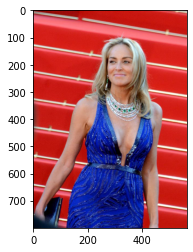

In [21]:
print("Laoding the sample piciure of Sharon Ston \n")

Sample= plt.imread('/content/Facial-Recognition-MMAI844-Tutorial/sample/sharon_stone1.jpg')
plt.imshow(Sample)

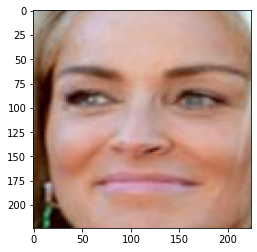

In [22]:
#####################################
# load the photo and extract the face
#####################################

extract_face = extract_face_from_file('/content/Facial-Recognition-MMAI844-Tutorial/sample/sharon_stone1.jpg')
plt.imshow(extract_face)

## Step 2.2 Check Model Input and output, and model summary

In [23]:
from keras_vggface.vggface import VGGFace
# create a vggface2 model
model = VGGFace(model='resnet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

165445632/165439116 [==============================] - 4s 0us/step
Inputs: [<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'classifier/Softmax:0' shape=(None, 8631) dtype=float32>]


We can see that the model expects input color images of faces with the shape of 244×244 and the output will be a class prediction of 8,631 people. The input dimension is 4. This means that you have to reshape your training set with .reshape(n_images, 286, 384, 1)

### prints out summary of model

The model expects input color images of faces with the shape of 244×244 and the output will be a class prediction of 8,631 people


In [24]:
#Printing out summary of model
model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

## Step 2.2 Prepare input and predict the image using Pre-train model

In [25]:
###########################################
# Prepare the input for feeding the model
###########################################

Face_array = asarray(extract_face,'float32')
Preprocess_face = preprocess_input(Face_array)
print(Preprocess_face.shape)
Preprocess_face_input = Preprocess_face.reshape(1, 224, 224, 3)
print(Preprocess_face_input.shape)

(224, 224, 3)
(1, 224, 224, 3)


#### Run Prediction and convert prediction into names

In [26]:
# perform prediction
yhat = model.predict(Preprocess_face_input)

In [27]:
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

1351680/1346516 [==============================] - 0s 0us/step
b' Sharon_Stone': 98.919%
b' Tina_Maze': 0.206%
b' Anita_Lipnicka': 0.064%
b' Noelle_Reno': 0.059%
b' Marianne_Thieme': 0.033%


#### Draw a rectangle on the original image with the prediction label

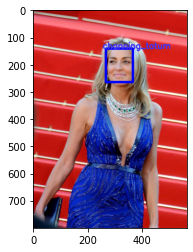

b' Sharon_Stone': 98.919%
b' Tina_Maze': 0.206%
b' Anita_Lipnicka': 0.064%
b' Noelle_Reno': 0.059%
b' Marianne_Thieme': 0.033%


In [28]:
def draw_rectangle_with_label(image, label):
    faces_coord = detector.detectMultiScale(image,
                                        scaleFactor=scale_factor,
                                        minNeighbors=min_neighbors,
                                        minSize=min_size,
                                        flags=flags)
    draw_rectangle(image,faces_coord)
    cv2.putText(image, name,    
                            (faces_coord[0][0], faces_coord[0][1]),
                            cv2.FONT_HERSHEY_SIMPLEX , 1, (66, 53, 243), 3)

    plt.imshow(image)
    plt.show()
    for result in results[0]:
        print('%s: %.3f%%' % (result[0], result[1]*100))

draw_rectangle_with_label(Sample, results)

## Step 2.3 Understand the hidden layer in VGG or CNN

<div style="float: left; width: 70%; height: 300px; padding-bottom:300px">
    <img src="https://s3.ap-southeast-1.amazonaws.com/datawow/uploader/blogs/1_gl4JHntNPHQt1G7txpiRMA.png" alt="CNN">
</div>
</div>

### Check the MaxPooling Layer

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1/7x7_s2 (Conv2D)        (None, 112, 112, 64)      9408      
_________________________________________________________________
conv1/7x7_s2/bn (BatchNormal (None, 112, 112, 64)      256       
_________________________________________________________________
activation_49 (Activation)   (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
Total params: 9,664
Trainable params: 9,536
Non-trainable params: 128
_________________________________________________________________


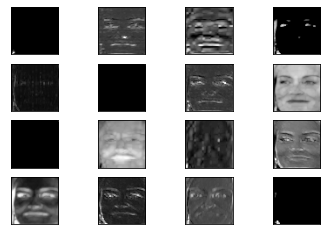

In [29]:
# load the model again
model = VGGFace(model='resnet50')

# redefine model to output right after the third hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[4].output)
model.summary()
# load the image with the required shape
img = extract_face
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 4 maps in an 4x4 squares
square = 4
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

### Check one of the Convolutional Layers



Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1/7x7_s2 (Conv2D)        (None, 112, 112, 64)      9408      
_________________________________________________________________
conv1/7x7_s2/bn (BatchNormal (None, 112, 112, 64)      256       
_________________________________________________________________
activation_98 (Activation)   (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2_1_1x1_reduce (Conv2D)  (None, 55, 55, 64)        4096      
_________________________________________________________________
conv2_1_1x1_reduce/bn (Batch (None, 55, 55, 64)       

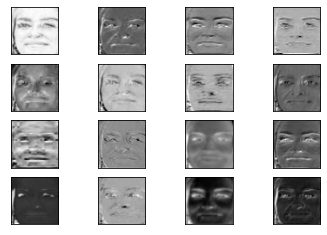

In [30]:
# load the model again
model = VGGFace(model='resnet50')

# redefine model to output right after the fifth hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[6].output)
model.summary()
# load the image with the required shape
img = extract_face
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 4 maps in an 4x4 squares
square = 4
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

# Step 3: Use Pre-trained Model for Your Photo Classification (Transfer Learning)

<div style="float: left; width: 85%; height: 350px; padding-bottom:280px">
    <img src="https://www.analyticssteps.com/backend/media/thumbnail/1967565/9315476_1592890541_transfer.jpg" alt="CNN">
</div>
</div>

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

### We are going to use a public dataset for training our own model 
### VGG model did not train on these dataset before. Basically, you can train whatever dataset you want

You can download the dataset from here: https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset

The photos haven't been cropped for consistent aspect ratios. With so few training photos, this an especially interesting test of computer vision techniques.

### See the sample data

Loading one of the sample picture 



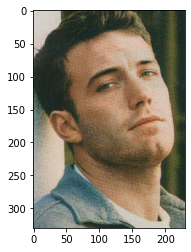

In [31]:
print("Loading one of the sample picture \n")

pixels = plt.imread("/content/Facial-Recognition-MMAI844-Tutorial/train/ben_afflek/httpwwwhillsindcomstorebenjpg.jpg")
plt.imshow(pixels)

In [32]:
from keras.preprocessing.image import ImageDataGenerator

### Step 3.1 Prepare input data and parameters

In keras there is a "image preprocessing function" **ImageDataGenerator** that can not only do the image preprocessing but also run data augmentation for you.
For more information please refer to: https://keras.io/api/preprocessing/image/

In [33]:
img_height=224
img_width=224
batch_size=8

## Step 3.2 Specify the data folder train and val

## ImageDataGenerator function can do all the image preprocessing for you !!!!

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    #shear_range=0.2,
    vertical_flip=False,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    '/content/Facial-Recognition-MMAI844-Tutorial/train',
    target_size=(img_width, img_height),
    batch_size=4,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    '/content/Facial-Recognition-MMAI844-Tutorial/val',
    target_size=(img_width, img_height),
    batch_size=4,
    class_mode='categorical')

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [35]:
######################################
#Model training and inputing parameters
#####################################
nb_class = 5
hidden_dim = 250
nb_train_samples = 93

nb_validation_samples = 25
epochs = 30
batch_size = 4
numclasses = 5

### New Model with different output layer (our own dataset is the new output layer)

In [36]:
vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))
last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x = Dense(hidden_dim, activation='relu', name='fc6')(x)
x = Dense(hidden_dim, activation='relu', name='fc7')(x)
out = Dense(nb_class, activation='softmax', name='fc8')(x)
custom_vgg_model = Model(vgg_model.input, out)

58916864/58909280 [==============================] - 2s 0us/step


In [37]:
custom_vgg_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)      

In [38]:
lr = 1e-5
decay = 1e-6 #0.0
optimizer = RMSprop(lr=lr, decay=decay)
custom_vgg_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

## Step 3.3 Train model 

### Due to the class time constraints, we will just train couple epoch here

In [39]:
history = custom_vgg_model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
23/23 [==============================] - 3s 131ms/step - loss: 1.6073 - accuracy: 0.1461 - val_loss: 1.5952 - val_accuracy: 0.2917
Epoch 2/30
23/23 [==============================] - 2s 93ms/step - loss: 1.5755 - accuracy: 0.4382 - val_loss: 1.5694 - val_accuracy: 0.5000
Epoch 3/30
23/23 [==============================] - 2s 94ms/step - loss: 1.4760 - accuracy: 0.6067 - val_loss: 1.4403 - val_accuracy: 0.4167
Epoch 4/30
23/23 [==============================] - 2s 94ms/step - loss: 1.3023 - accuracy: 0.5730 - val_loss: 1.2539 - val_accuracy: 0.4167
Epoch 5/30
23/23 [==============================] - 2s 95ms/step - loss: 0.9105 - accuracy: 0.7191 - val_loss: 0.9935 - val_accuracy: 0.5417
Epoch 6/30
23/23 [==============================] - 2s 94ms/step - loss: 0.6928 - accuracy: 0.7640 - val_loss: 0.7796 - val_accuracy: 0.6667
Epoch 7/30
23/23 [==============================] - 2s 95ms/step - loss: 0.59

## Step 3.4 Visualize the training and validation accuracy and loss

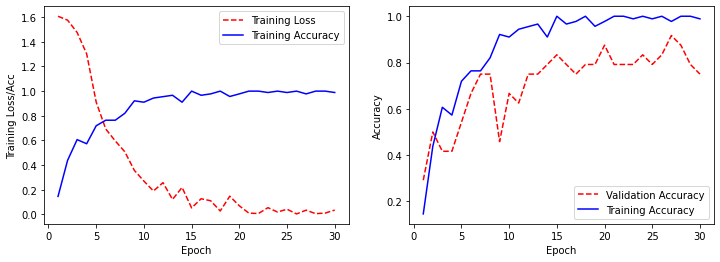

In [40]:
# Get training and test loss histories
training_loss = history.history['loss']
training_acc = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig=plt.figure(figsize=(12, 4))
# Visualize loss history
fig.add_subplot(121)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, training_acc, 'b-')
plt.legend(['Training Loss', 'Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss/Acc')

# Get training and test loss histories
val_acc = history.history['val_accuracy']
training_acc = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(val_acc) + 1)

# Visualize loss history
fig.add_subplot(122)
plt.plot(epoch_count, val_acc, 'r--')
plt.plot(epoch_count, training_acc, 'b-')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show();

## Step 3.5 Save the model and run prediction

In [41]:
saveweight =  'celebriytag_weight.h5'
model.save_weights(saveweight)

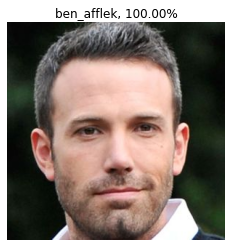

In [42]:
labels = ['ben_afflek',  'elton_john',  'jerry_seinfeld',  'madonna',  'mindy_kaling']
test_imgs = ['/content/Facial-Recognition-MMAI844-Tutorial/val/ben_afflek/123MTENDgMDUODczNDcNTcjpg.jpg']


test_img = '/content/Facial-Recognition-MMAI844-Tutorial/val/ben_afflek/123MTENDgMDUODczNDcNTcjpg.jpg'
img = load_img(test_img, target_size=(img_width, img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.
classes = custom_vgg_model.predict(x)
result = np.squeeze(classes)
result_indices = np.argmax(result)
    
img = cv2.imread(test_img, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
plt.imshow(img)

## Hope you enjoyed the tutorial